### Import Files and Folders

In [17]:
import glob

csv_folder = 'dataset/CSV/'
#csv_files = glob.glob(csv_folder+'**/*.csv')#,recursive=True)
#csv_files.sort()
folder_path = glob.glob(csv_folder+'*')
months_files = {}

for path in folder_path:
    key = path.split('/')[2] # month name as the dictionary keys
    files_in_this_folder = glob.glob(path+'/*.csv')
    files_in_this_folder.sort() # each month related csv files in list stored as dictionary value (files_in_this_folder)
    months_files[key] = files_in_this_folder

print(months_files.keys())   

dict_keys(['October', 'December', 'July', 'August', 'November', 'September'])


### Plotting the standard deviation for each Month
- Parameters include selecting which month from the above list
- For standard deviation, select the duration parameter. (ENF is plotted for 2 seconds frame size, so 1 minute would be dur = 30)
- Output plot should include all the days in a given month

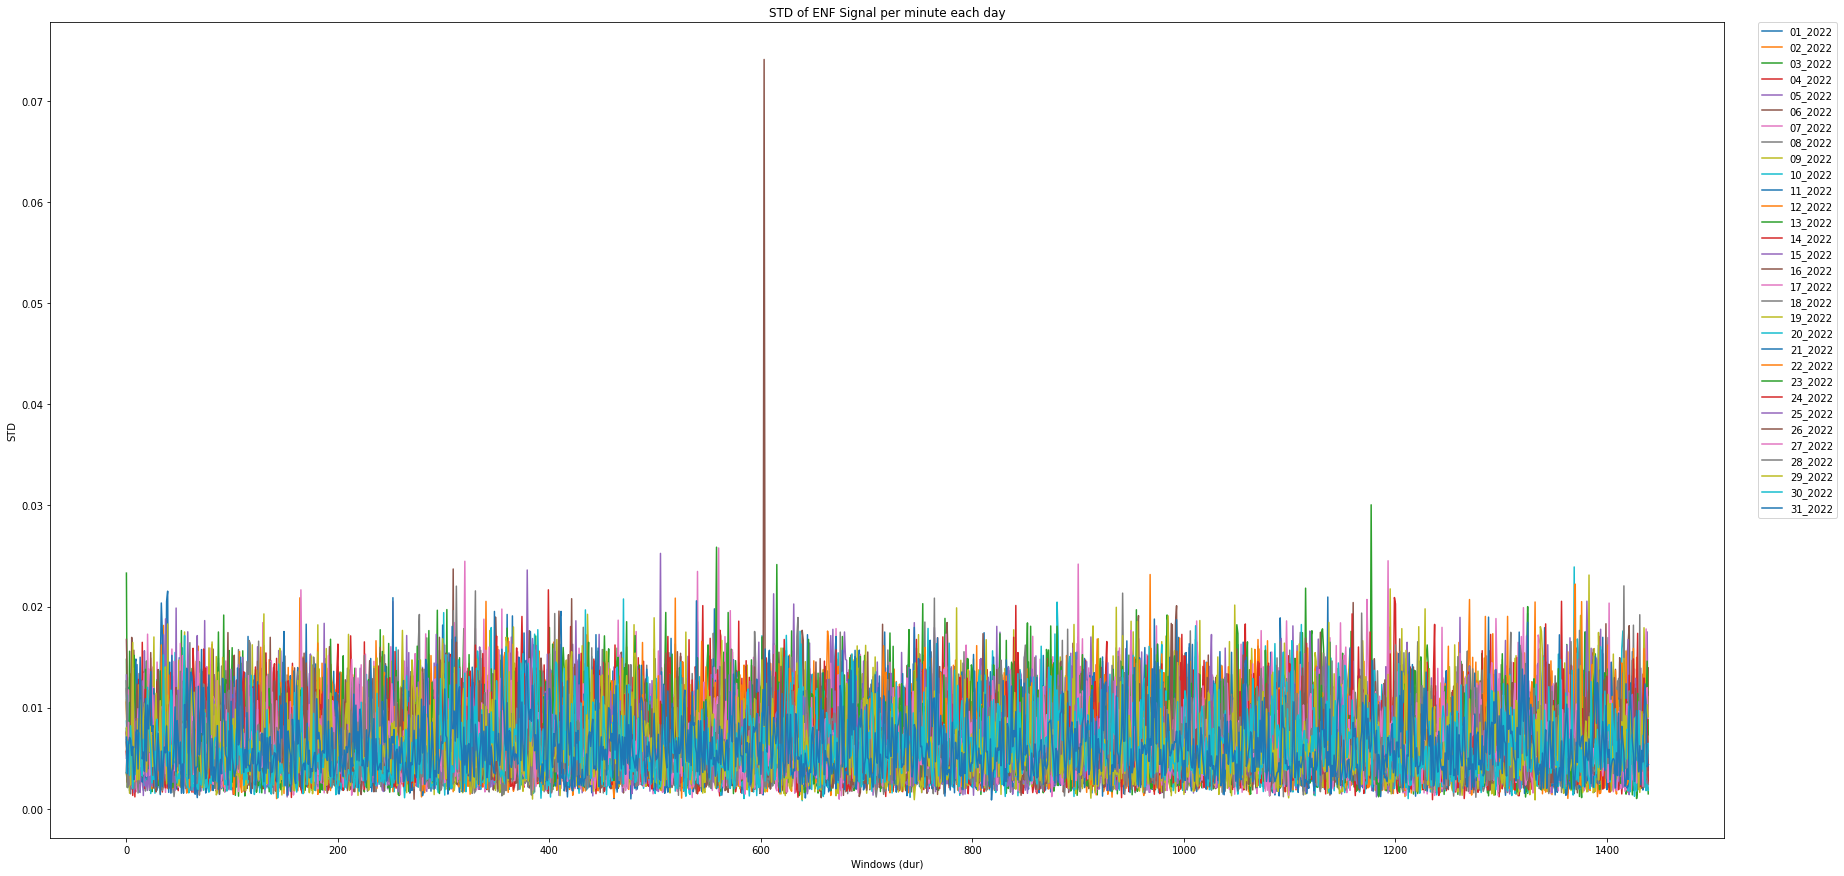

In [67]:
import numpy as np
import matplotlib.pyplot as plt
month = 'October'
days_csv = months_files[month]
# examples for dur: 1 minute = 30, 30 minutes = 900, 1 hour = 1800
dur = 30 #duration for standard deviation evaluation
std_days = {}
for day_file in days_csv:
    date = day_file.split('.')[0][-7:]
    file = open(day_file,'r')
    ENF_per_day = []
    for line in file:
        ENF_per_day.append(float(line.split(',')[1]))
    file.close()
    windows = int(len(ENF_per_day)/dur)
    std_per_day = []
    for i in range(0,windows):
        std_per_day.append(np.std(ENF_per_day[i*dur:i*dur+dur]))
    std_days[date] = std_per_day
#t = len(std_per_day)
#print(len(std_days['01_2022']))

# plotting the collected std variation for each day in the same plot
all_days_in_month = std_days.keys()
for each_day in all_days_in_month:
    plt.plot(std_days[each_day],label=each_day)


plt.title("STD of ENF Signal per minute each day")
plt.ylabel("STD")
plt.xlabel("Windows (dur)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.rcParams['figure.figsize'] = [30, 15]
plt.show()

### Compare multiple months trend
- First, errormaps are plotted for standard deviation variation in a day, and combining all the plots from months.

No handles with labels found to put in legend.


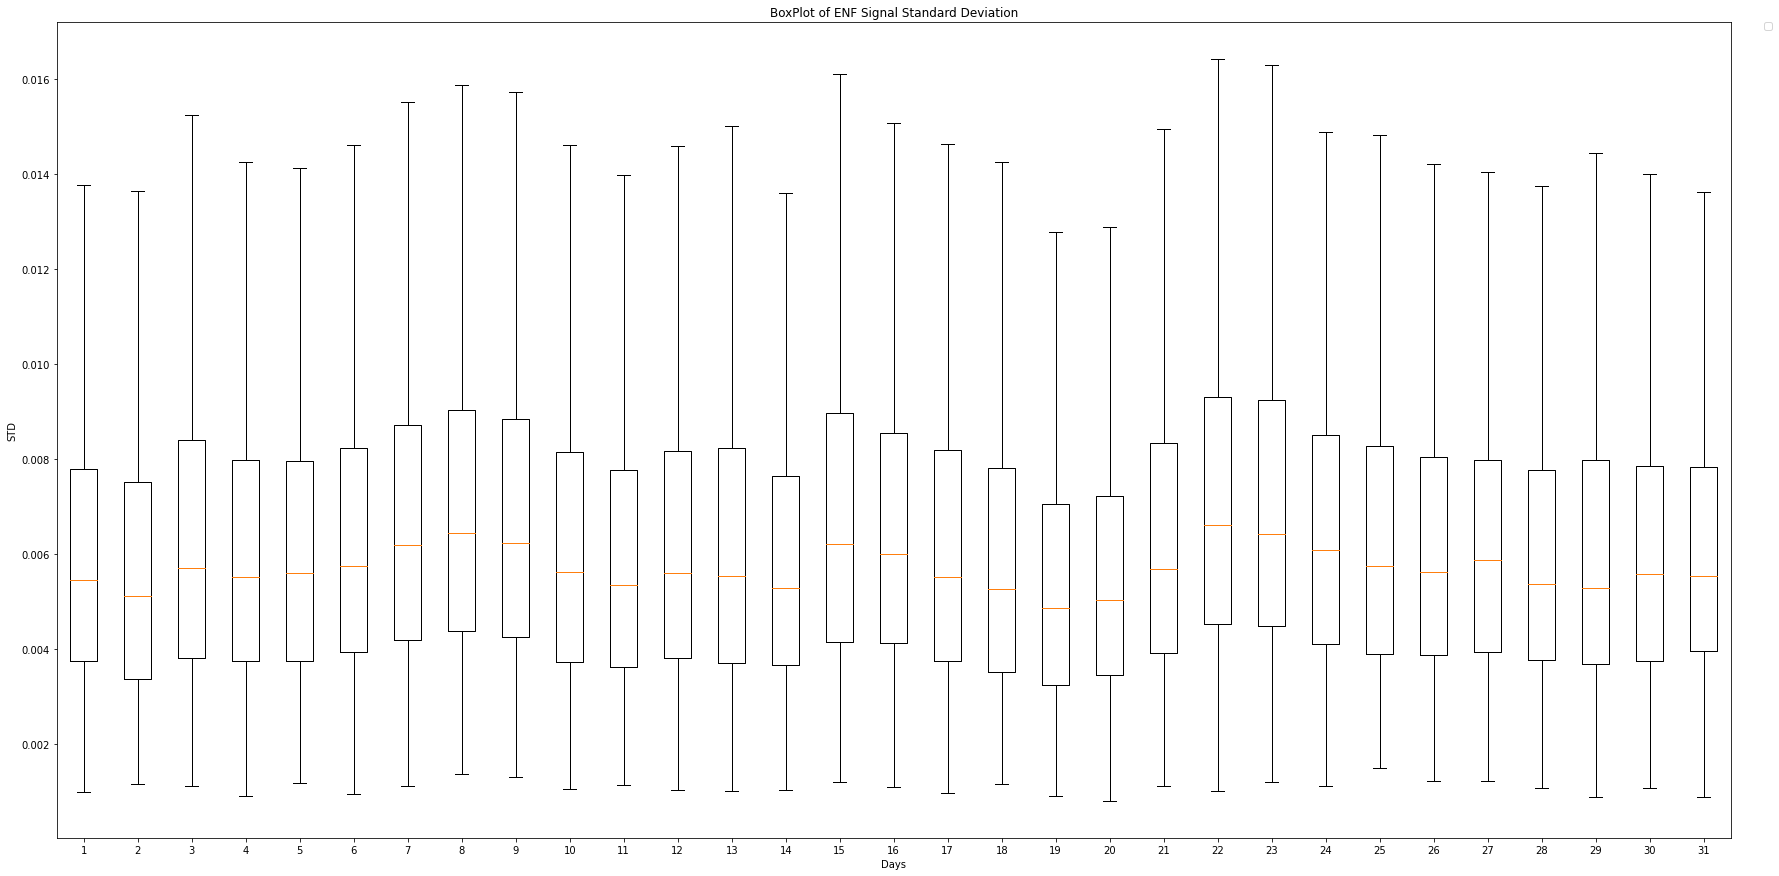

In [73]:
all_days_in_month = std_days.keys()
values = []
for each_day in all_days_in_month:
    values.append(std_days[each_day])

plt.boxplot(values,notch=False,showfliers=False) 
plt.title("BoxPlot of ENF Signal Standard Deviation")
plt.ylabel("STD")
plt.xlabel("Days")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.rcParams['figure.figsize'] = [30, 15]
plt.show()